In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv('./adult.data')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


<br />

### clean up and understand the data

<br />

In [3]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [4]:
df.drop([' 2174', ' 0', ' 40'], axis=1, inplace=True)
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [5]:
df.columns = ['Age', 'Ownership', 'ID', 'Education', 'Finished_Projects', 'Status', 'Job', 'Family', 'Race', 'Gender', 'Country', 'Salary']
df.head()

,Age,Ownership,ID,Education,Finished_Projects,Status,Job,Family,Race,Gender,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32560 non-null  int64 
 1   Ownership          32560 non-null  object
 2   ID                 32560 non-null  int64 
 3   Education          32560 non-null  object
 4   Finished_Projects  32560 non-null  int64 
 5   Status             32560 non-null  object
 6   Job                32560 non-null  object
 7   Family             32560 non-null  object
 8   Race               32560 non-null  object
 9   Gender             32560 non-null  object
 10  Country            32560 non-null  object
 11  Salary             32560 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
ID,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Finished_Projects,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0


<br />
Check for null values in the dataset
<br />

In [8]:
df.isnull().sum()

Age                  0
Ownership            0
ID                   0
Education            0
Finished_Projects    0
Status               0
Job                  0
Family               0
Race                 0
Gender               0
Country              0
Salary               0
dtype: int64

In [9]:
from collections import Counter

def pie_chart(chart_title, df_column):
    counter_dict = Counter()

    label = []
    label_count = []

    for e in df_column:
        counter_dict.update({e})

    for x in counter_dict.most_common(5):
        label.append(x[0])
        label_count.append(x[1])

    plt.rcParams["figure.figsize"] = (7,5)
    plt.pie(label_count, labels=label, autopct='%1.1f%%')
    plt.title(chart_title)
    plt.tight_layout()
    plt.show()

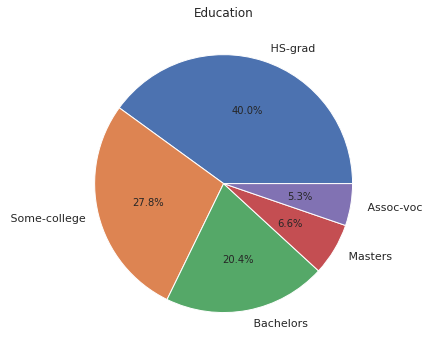

In [10]:
pie_chart("Education", df.Education)

<br />

#### Inference: 67% of the population is either a High school graduates or went to community colleges

<br />

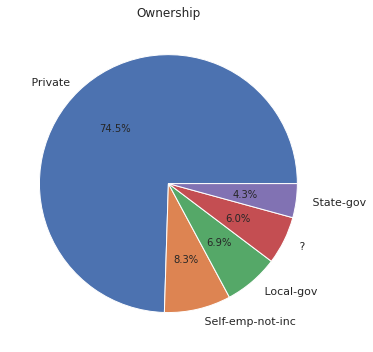

In [11]:
pie_chart("Ownership", df.Ownership)

<br />

#### Inference: 70% jobs are in the private sector

<br />

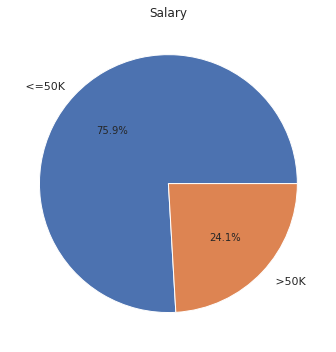

In [12]:
pie_chart("Salary", df.Salary)

<br />

#### Inference: 76% of the people make less than 50K

<br />

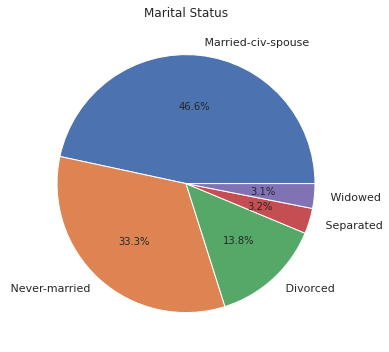

In [13]:
pie_chart("Marital Status", df.Status)

In [14]:
def bar_chart(chart_title, df_column):
    counter_dict = Counter()

    label = []
    label_count = []

    for e in df_column:
        counter_dict.update({e})

    for x in counter_dict.most_common(10):
        label.append(x[0])
        label_count.append(x[1])
    
    for i in range(len(label)):
        if label[i] == ' ?':
            label[i] = 'Misc.'
            
    plt.rcParams["figure.figsize"] = (15,15)
    plt.barh(label, label_count)
    plt.title(chart_title)
    plt.tight_layout()
    plt.show()

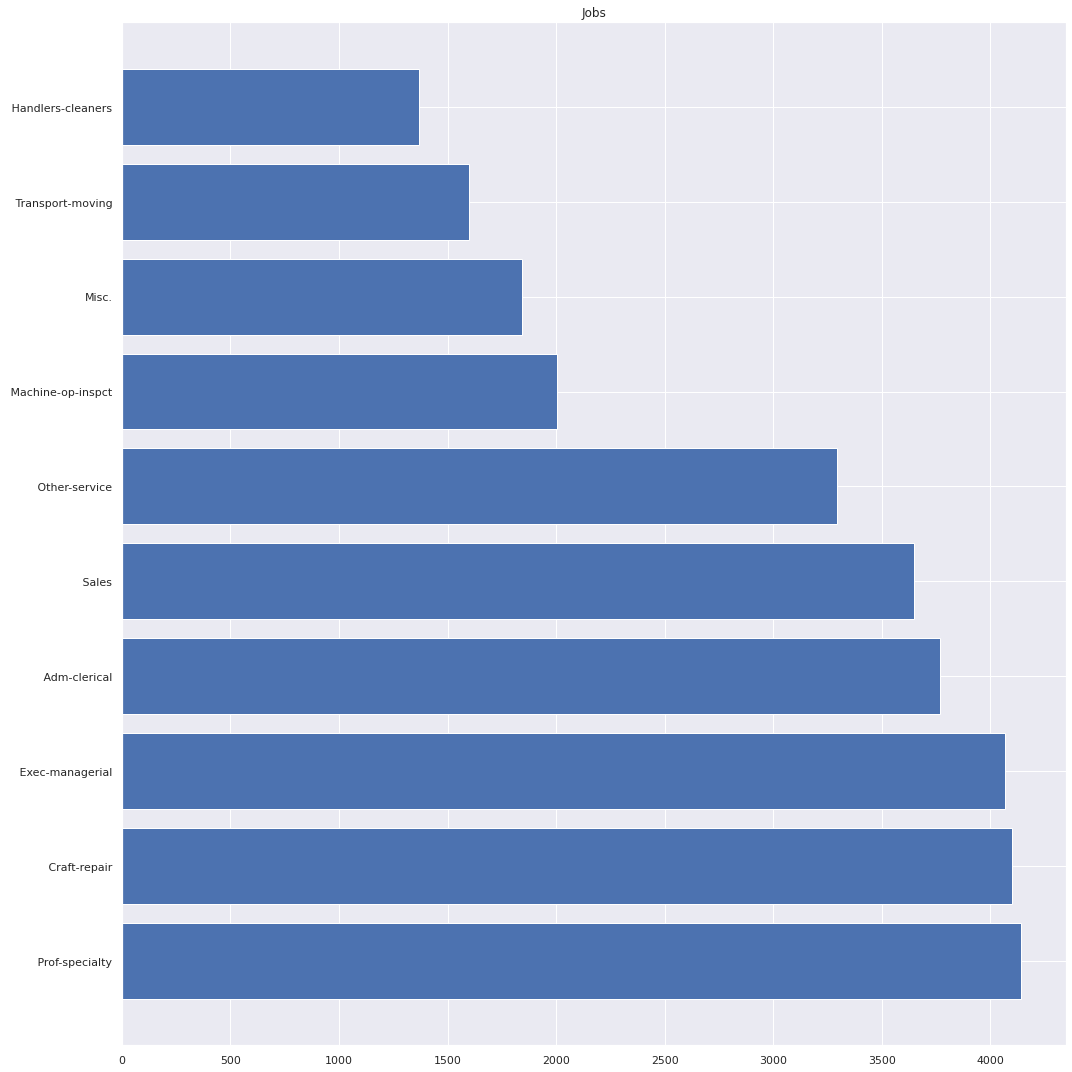

In [15]:
bar_chart("Jobs", df.Job)

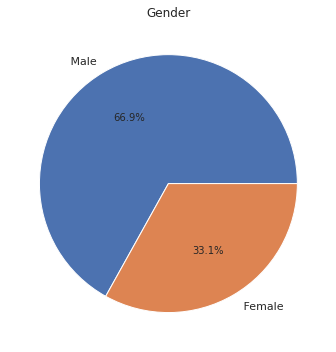

In [16]:
pie_chart("Gender", df.Gender)

<br />

#### Inference: 67 % of the work force is men

<br />